In [132]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [25]:
# Can load the entire response feedback file because this is just an example csv file for demo.
file = '../data/interim/response_feedback.csv'
data = pd.read_csv(file, names=['Date', 'Question', 'Response', 'Feedback_Helpful'], index_col='Date')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2020-12-27 21:29:25.240121 to 2020-12-27 21:41:10.112757
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Question          25 non-null     object
 1   Response          25 non-null     object
 2   Feedback_Helpful  25 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [19]:
data

,Question,Response,Feedback_Helpful
Date,,,
2020-12-27 21:29:25.240121,How can I add a new feature?,Users can submit enhancement requests at '.../...,1
2020-12-27 21:29:48.687221,Can you help me fix this null pointer,This is caused by a missing value in setup. To...,1
2020-12-27 21:30:09.487626,how does this work,Take a look at '.../product_ideas.com' to see ...,5
2020-12-27 21:30:44.688218,how can i talk to a real person,Billable work orders are available on request....,5
2020-12-27 21:31:27.304576,Fix caused by: one of several different types ...,Sorry about that. This is an unknown issue. Pl...,2
2020-12-27 21:31:54.375885,I have an error on line number 680,This has been fixed in version 2020.XX. Please...,1
2020-12-27 21:32:10.568496,where can i see what was fixed last week,Release and patch notes are available at '.../...,1
2020-12-27 21:32:47.848581,want to ask a question. but not sure how to as...,Users can submit enhancement requests at '.../...,4
2020-12-27 21:33:04.711986,how can we update our application?,Application are updated at '.../deployment/ser...,1


In [112]:
# Getting just the feedback score data
feedback = data["Feedback_Helpful"]
feedback.count()

25

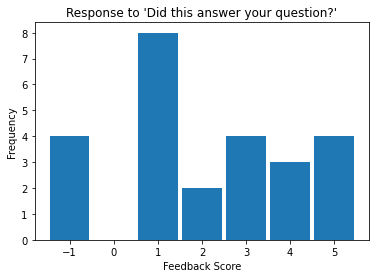

In [125]:
# Histogram of the feedback score
feedback.plot(kind="hist", bins=range(-1, 7), align='left', rwidth=0.9)
plt.title("Response to 'Did this answer your question?'")
plt.xlabel("Feedback Score")
plt.show()

In [127]:
# Count of the various feedback scores
counts = feedback.value_counts().sort_index()
counts

-1    4
 1    8
 2    2
 3    4
 4    3
 5    4
Name: Feedback_Helpful, dtype: int64

In [128]:
scores = ["-1 = The bot did not understand the question.",
          "1 = Yes, this is what I was looking for!", 
          "2 = Yes, but I do not like how this works.",
          "3 = Maybe, I have some instructions to follow.",
          "4 = No, but I found the answer somewhere else.",
          "5 = No, this bot has a lot to learn."]

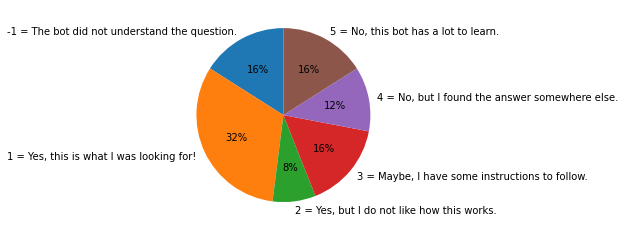

In [129]:
# Pie Chart of the feedback score
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=scores, autopct='%1.0f%%', startangle=90)
plt.show()

In [135]:
# Interactive Pie Chart using Plotly
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=scores, values=counts, hole=.3)])
fig.show()

## Summary
Depending on the response we could take the following actions in the future to improve the software:  
* -1 and 5: Are areas we can provide add more responses to in the intents section.  
* 4: Is something we could add additional logic in the code to ask the user if they are willing to provide information to help the bot learn what the desired answer was.  
* 2: Could help identify areas we need to enhance in the future. We could also provide links to the community discussion forum to help facilitate further discussion.  
* 3: We could allow the user to save their earlier discussion. That way if they still have issues afterwards they can return and start where they left off.  
* 1: This response is what we're aiming for. An accurate and quick reply that solves the problem.  